In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot
from keras.utils import plot_model
from tensorflow.contrib.tensorboard.plugins import projector
from gensim.models.doc2vec import LabeledSentence


In [2]:
import h5py
import pickle
from keras.models import load_model

In [3]:
import tensorflow as tf
import pandas as pd
import json
import seaborn as sns

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import  cross_val_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pickle 
import scipy
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import os


from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import gensim
import pickle
from gensim.models.doc2vec import LabeledSentence

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import keras
from keras.preprocessing import sequence
import math
%matplotlib inline

//anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import multiprocessing
import re
import gensim.models.word2vec
import gensim.models.word2vec as w2v

In [5]:
with open("big_data.txt", "rb") as fp:   # Unpickling
...   data = pickle.load(fp)

In [6]:
with open("big_data_label.txt", "rb") as fp:   # Unpickling
...   labels = pickle.load(fp)


In [7]:
vocabulary_size = len(data)
embedding_size = 200
batch_size=128

## Word2vec tensorboard

In [8]:
## get the words from the sentences , tokenizing
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw) ## regular expression to get the words
    words = clean.split()
    return words

In [11]:
sentences = []
for raw_sentence in data: ## get the sentences from our data and tokenize them using the function predefined
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [9]:
print(data[5])
print(sentence_to_wordlist(data[5])) ## having a look at the words of the given sentence

Bake for 10-12 minutes until cooked through and golden brown.
[u'Bake', u'for', u'minutes', u'until', u'cooked', u'through', u'and', u'golden', u'brown']


In [13]:
## get the total number of tokens in our dataset
token_count = sum([len(sentence) for sentence in sentences])
print("data contains {0:,} tokens".format(token_count))

data contains 13,760,054 tokens


In [15]:
num_features = 200

# Minimum word count threshold.
min_word_count = 1

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#rate 0 and 1e-5 
#how often to use
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [16]:
## specify  the parameters for the word2vec model created using gensim
food2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [17]:
## build the vocabulary
food2vec.build_vocab(sentences)

In [18]:
## Total vectors after we repreent the words in our data as vectors
num_w2v = len(food2vec.wv.index2word)
print (num_w2v)

89026


In [19]:
## current working directory
!pwd

/Users/pranavakaarthikprabhakaran/Desktop/capstone-project


In [ ]:
FOLDER = "WORDS/word2vec"

In [27]:
## We created a matrix of zeroes for the specified dimension 
w2v = np.zeros((num_w2v,200))
with open("WORDS/metadata.tsv", 'w+') as file_metadata: ## Tensorboard requires that we store labels as a tsv file
    for i,word in enumerate(food2vec.wv.index2word): ## get the word and the vector that reprsents the word
        w2v[i] = food2vec[word]
        file_metadata.write(word + '\n')

In [21]:
w2v.shape ## asserting the shape of our word2vec matrix

(89026, 200)

In [24]:
#FOLDER = "WORDS/word2vec"

In [25]:
## Here we pass the vectors we created into tensors to visalise them
from tensorflow.contrib.tensorboard.plugins import projector


# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()

X = tf.Variable([0.0], name='embedding')
place = tf.placeholder(tf.float32, shape=[None, 200])
set_x = tf.assign(X, place, validate_shape=False)

sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: w2v})

# create a TensorFlow summary writer
#summary_writer = tf.summary.FileWriter('logs', sess.graph)
summary_writer = tf.summary.FileWriter(FOLDER,sess.graph)

# Format: tensorflow/contrib/tensorboard/plugins/projector/projector_config.proto
config = projector.ProjectorConfig()


embedding_conf = config.embeddings.add()
# Link the tensor to its metadata file (e.g. labels).
embedding_conf.tensor_name = 'embedding:0'
embedding_conf.metadata_path = FOLDER +'/metadata.tsv' 

# The next line writes a projector_config.pbtxt in the LOG_DIR. TensorBoard will
# read this file during startup.
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, FOLDER + 'model.ckpt')
sess.close()

In [26]:
with open('metadata.tsv', 'w') as file:
    file.writelines(df.to_csv(sep='\t',index=False))

NameError: name 'df' is not defined

## Doc2vec Gensim

In [28]:
with open("doc2vec_data.txt", "rb") as fp:   # Unpickling
...   data = pickle.load(fp)

In [29]:
with open("doc2vec_label.txt", "rb") as fp:   # Unpickling
...   labels = pickle.load(fp)

In [30]:
docs = LabeledSentence(words=data,tags=labels) #documents

In [32]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield LabeledSentence(words=doc.split(),tags=[self.labels_list[idx]])

In [33]:
it = LabeledLineSentence(data, labels)
words = []
for i in it:
    #j = j+1
    words.append(i[0])

In [34]:
model = gensim.models.Doc2Vec(size=10, window=10, min_count=5, workers=40,alpha=0.025, min_alpha=0.025)
model.build_vocab(it)

In [35]:
for epoch in range(3):
    model.train(it,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca

In [36]:
model.save('capstone.doc2vec')

In [37]:
doc_vecs = [model.infer_vector(words[i]) for i in range(0,len(words))]

In [ ]:
#dist = 1 - cosine_similarity(doc_vecs)

In [ ]:
#len(dist)

In [ ]:
#labels

## Doc2vec Tensorboard

In [38]:
## Convert our labels represented as numbers to names
labels_names1 = []
for i in labels:
    if i == 0:
        labels_names1.append('preparation')
    elif i == 1:
        labels_names1.append('ingredients')
    elif i == 2:
        labels_names1.append('nutrient')
    elif i == 3:
        labels_names1.append('reviews')
    else:
        labels_names1.append('title')
    


In [39]:
## provide colors for each of the labels
labels_names = []
for i in labels:
    if i == 0:
        labels_names.append('red')
    elif i == 1:
        labels_names.append('green')
    elif i == 2:
        labels_names.append('blue')
    elif i == 3:
        labels_names.append('pink')
    else:
        labels_names.append('black')

In [42]:
## Convert the doc2vec array to a 2d matrix
d2v = np.array(doc_vecs)

In [43]:
## check the shape
d2v.shape

(17914, 10)

In [45]:
## make a directory to store the checkpoints
!mkdir doc2

In [47]:
FOLDER = 'doc2'

In [48]:
## Create pandas dataframe of labels and their names
df1=pd.DataFrame()

In [49]:
df1['labels']=labels_names1

In [50]:
df1['colors']=labels_names

In [ ]:
## Alternative way to write the tsv metadata file
#with open(FOLDER + "/metadata.tsv", 'w+') as file_metadata:
    #for i in labels_names1:
        #file_metadata.write(i)

In [53]:
## Create our metadata tsv file to store the labels 
with open(FOLDER + '/metadata.tsv', 'w') as file:
    file.writelines(df1.to_csv(sep='\t',index=False))

In [56]:
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()

X = tf.Variable([0.0], name='embedding')
place = tf.placeholder(tf.float32, shape=[None, 10])
set_x = tf.assign(X, place, validate_shape=False)

sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: d2v})

# create a TensorFlow summary writer
#summary_writer = tf.summary.FileWriter('logs', sess.graph)
summary_writer = tf.summary.FileWriter(FOLDER,sess.graph)

# Format: tensorflow/contrib/tensorboard/plugins/projector/projector_config.proto
config = projector.ProjectorConfig()

# You can add multiple embeddings. Here we add only one.
embedding_conf = config.embeddings.add()


embedding_conf.tensor_name = 'embedding:0'

# Link this tensor to its metadata file (e.g. labels).
embedding_conf.metadata_path = FOLDER +'/metadata.tsv' 

# The next line writes a projector_config.pbtxt in the LOG_DIR. TensorBoard will
# read this file during startup.
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, FOLDER + 'model.ckpt')
sess.close()

## DOC2VEC INTO A FEED FORWARD DEEP NEURAL NETWORK

In [13]:
## train-test split using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(doc_vecs,labels, test_size=.3,
                                                  random_state=5)


In [16]:
## Representing our lables as a one hot encoding
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(y_train)
test_y_ohe = one_hot_encode_object_array(y_test)

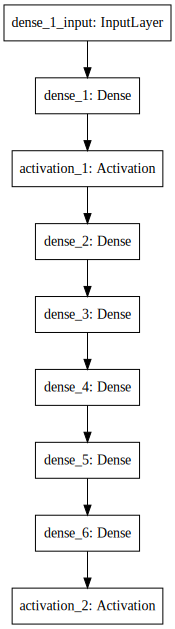

In [57]:
## define our model, deep feed forward network , with the specified units in dense layers
model = Sequential()
model.add(Dense(1000, input_shape=(10,))) ## Input takes in ten points as we know our doc2vec embeddings are for 10 dimensions
model.add(Activation('relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(750, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu')) ## activated by the relu finction
model.add(Dense(5))
model.add(Activation('softmax')) ## activated by the softmax function
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              11000     
_________________________________________________________________
activation_7 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 750)               750750    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               375500    
_________________________________________________________________
dense_23 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 1255      
__________

In [21]:
## model is compiled on a categorical_crossentropy loss since it's a multi-class problem, optimized by adam and accuracy as metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
## fit the model over 10 epochs , specifying the validation split, standard batch size of 128
history = model.fit(np.array(X_train), train_y_ohe,
                    nb_epoch=10, batch_size=128,
                    verbose=1, validation_split=0.2)

Train on 10031 samples, validate on 2508 samples
Epoch 1/10
10031/10031 [==============================] - 9s - loss: 0.9937 - acc: 0.6042 - val_loss: 0.7944 - val_acc: 0.6942
Epoch 2/10
10031/10031 [==============================] - 8s - loss: 0.7924 - acc: 0.6978 - val_loss: 0.7771 - val_acc: 0.6910
Epoch 3/10
10031/10031 [==============================] - 8s - loss: 0.7516 - acc: 0.7133 - val_loss: 0.7445 - val_acc: 0.7113
Epoch 4/10
10031/10031 [==============================] - 8s - loss: 0.7347 - acc: 0.7219 - val_loss: 0.7675 - val_acc: 0.7069
Epoch 5/10
10031/10031 [==============================] - 8s - loss: 0.7196 - acc: 0.7242 - val_loss: 0.7665 - val_acc: 0.7161
Epoch 6/10
10031/10031 [==============================] - 8s - loss: 0.6964 - acc: 0.7325 - val_loss: 0.7382 - val_acc: 0.7189
Epoch 7/10
10031/10031 [==============================] - 8s - loss: 0.6897 - acc: 0.7372 - val_loss: 0.7366 - val_acc: 0.7201
Epoch 8/10
10031/10031 [==============================] - 8s -

In [23]:
## check score on test data
score = model.evaluate(np.array(X_test), test_y_ohe,
                       batch_size=128, verbose=1)

5248/5375 [============================>.] - ETA: 0s

In [24]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.74857067370969199)
('Test accuracy:', 0.71255813912458199)


In [25]:
## Get the model predictions
y_predicted_arr = model.predict(np.array(X_test))

In [27]:
## Get the most probably class prediction of the model
y_predicted = []
for i in y_predicted_arr:
    y_predicted.append(np.where(np.max(i) == i)[0][0])

In [28]:
## convert the one hot encoding back to original numbered values
y_test = []
for i in test_y_ohe:
    y_test.append(np.where(i == 1)[0][0])

In [29]:
## recall score of the model using scikit-learn (true positive/ true positive + false negative)
recall_score(y_test, y_predicted, average='weighted')

0.71255813953488367

In [30]:
## precision score of the model using scikit-learn (true positive/ true positive + false positive)
precision_score(y_test, y_predicted, average='weighted')

0.7140556697511834

In [31]:
## f1-score of the model using scikit-learn (2 * (precision * recall) / (precision + recall))
f1_score(y_test, y_predicted, average='weighted')

0.70653446622555138

In [32]:
## Confusion matrix that gives us sentences that were predicted correctly and that weren't ( ex : 0th row and 1st column indicates preparation misclassified as an ingredient)
pd.DataFrame(metrics.confusion_matrix(y_test,y_predicted),columns = ['preparation(0)','ingredients(1)','nutrient(2)','reviews(3)','title(4)'])

,preparation(0),ingredients(1),nutrient(2),reviews(3),title(4)
0,425,153,85,187,102
1,43,647,51,40,88
2,62,54,1120,53,30
3,57,80,44,1102,28
4,58,215,87,28,536


## Miscellaneous

In [58]:
model =  load_model('autoencoder.h5')

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 100)            8424100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 16)             4816      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 16)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 8)              392       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 8)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 8)              200       
__________

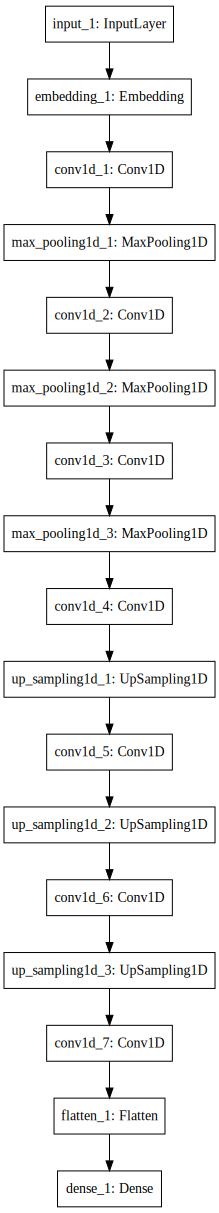

In [60]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [61]:
plot_model(model,show_shapes=True, to_file='autoencoder.png')